In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from scipy import stats
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

plt.style.use('bmh')

In [16]:

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [70]:
df = pd.read_csv('data/raw/census_income.csv')
df.head(1)

,Unnamed: 0,id,age,sex,race,marital_status,relationship_label,relationship,functional_weight,education,education_num,workclass,occupation,capital_gain,capital_loss,hours_per_week,native_country,country_name,income_bracket
0,0,1623,17,Male,White,Married-civ-spouse,0,Husband,221129,9th,5,Private,Other-service,0,0,40,39,United-States,<=50K


In [71]:
summary = pd.read_csv('my_summary_outlier_mask.csv')

In [72]:
summary.head(1)

,Unnamed: 0,std,iqr,euclid,cityblock,dbscan,svm,isolation
0,0,0,0,0,0,0,0,0


In [73]:
summary.shape, df.shape

((32561, 8), (32561, 19))

In [74]:
summary.drop('Unnamed: 0', axis = 1, inplace = True)

In [75]:
summary.sum(axis=1).value_counts()

0    13369
1    10823
2     2649
3     2263
4     1430
5     1069
6      512
7      446
dtype: int64

In [76]:
mask_clear_all = summary.sum(axis=1) < 6

In [78]:
df[mask_clear_all]

,Unnamed: 0,id,age,sex,race,marital_status,relationship_label,relationship,functional_weight,education,education_num,workclass,occupation,capital_gain,capital_loss,hours_per_week,native_country,country_name,income_bracket
0,0,1623,17,Male,White,Married-civ-spouse,0,Husband,221129,9th,5,Private,Other-service,0,0,40,39,United-States,<=50K
1,1,14761,17,Male,White,Never-married,3,Own-child,191260,9th,5,Private,Other-service,1055,0,24,39,United-States,<=50K
2,2,14762,17,Male,Black,Never-married,3,Own-child,32124,9th,5,Local-gov,Other-service,0,0,9,39,United-States,<=50K
3,3,14769,17,Male,Black,Never-married,3,Own-child,127003,9th,5,?,?,0,0,40,39,United-States,<=50K
4,4,14796,17,Male,Black,Never-married,3,Own-child,133449,9th,5,Private,Other-service,0,0,26,39,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,32555,23293,90,Female,White,Never-married,1,Not-in-family,141758,9th,5,Private,Adm-clerical,0,0,40,39,United-States,<=50K
32556,32556,23939,90,Female,Black,Widowed,1,Not-in-family,166343,1st-4th,2,?,?,0,0,40,39,United-States,<=50K
32557,32557,24137,90,Female,White,Separated,1,Not-in-family,175444,7th-8th,4,?,?,0,0,15,39,United-States,<=50K
32558,32558,24250,90,Female,White,Never-married,1,Not-in-family,137018,HS-grad,9,Private,Other-service,0,0,40,39,United-States,<=50K


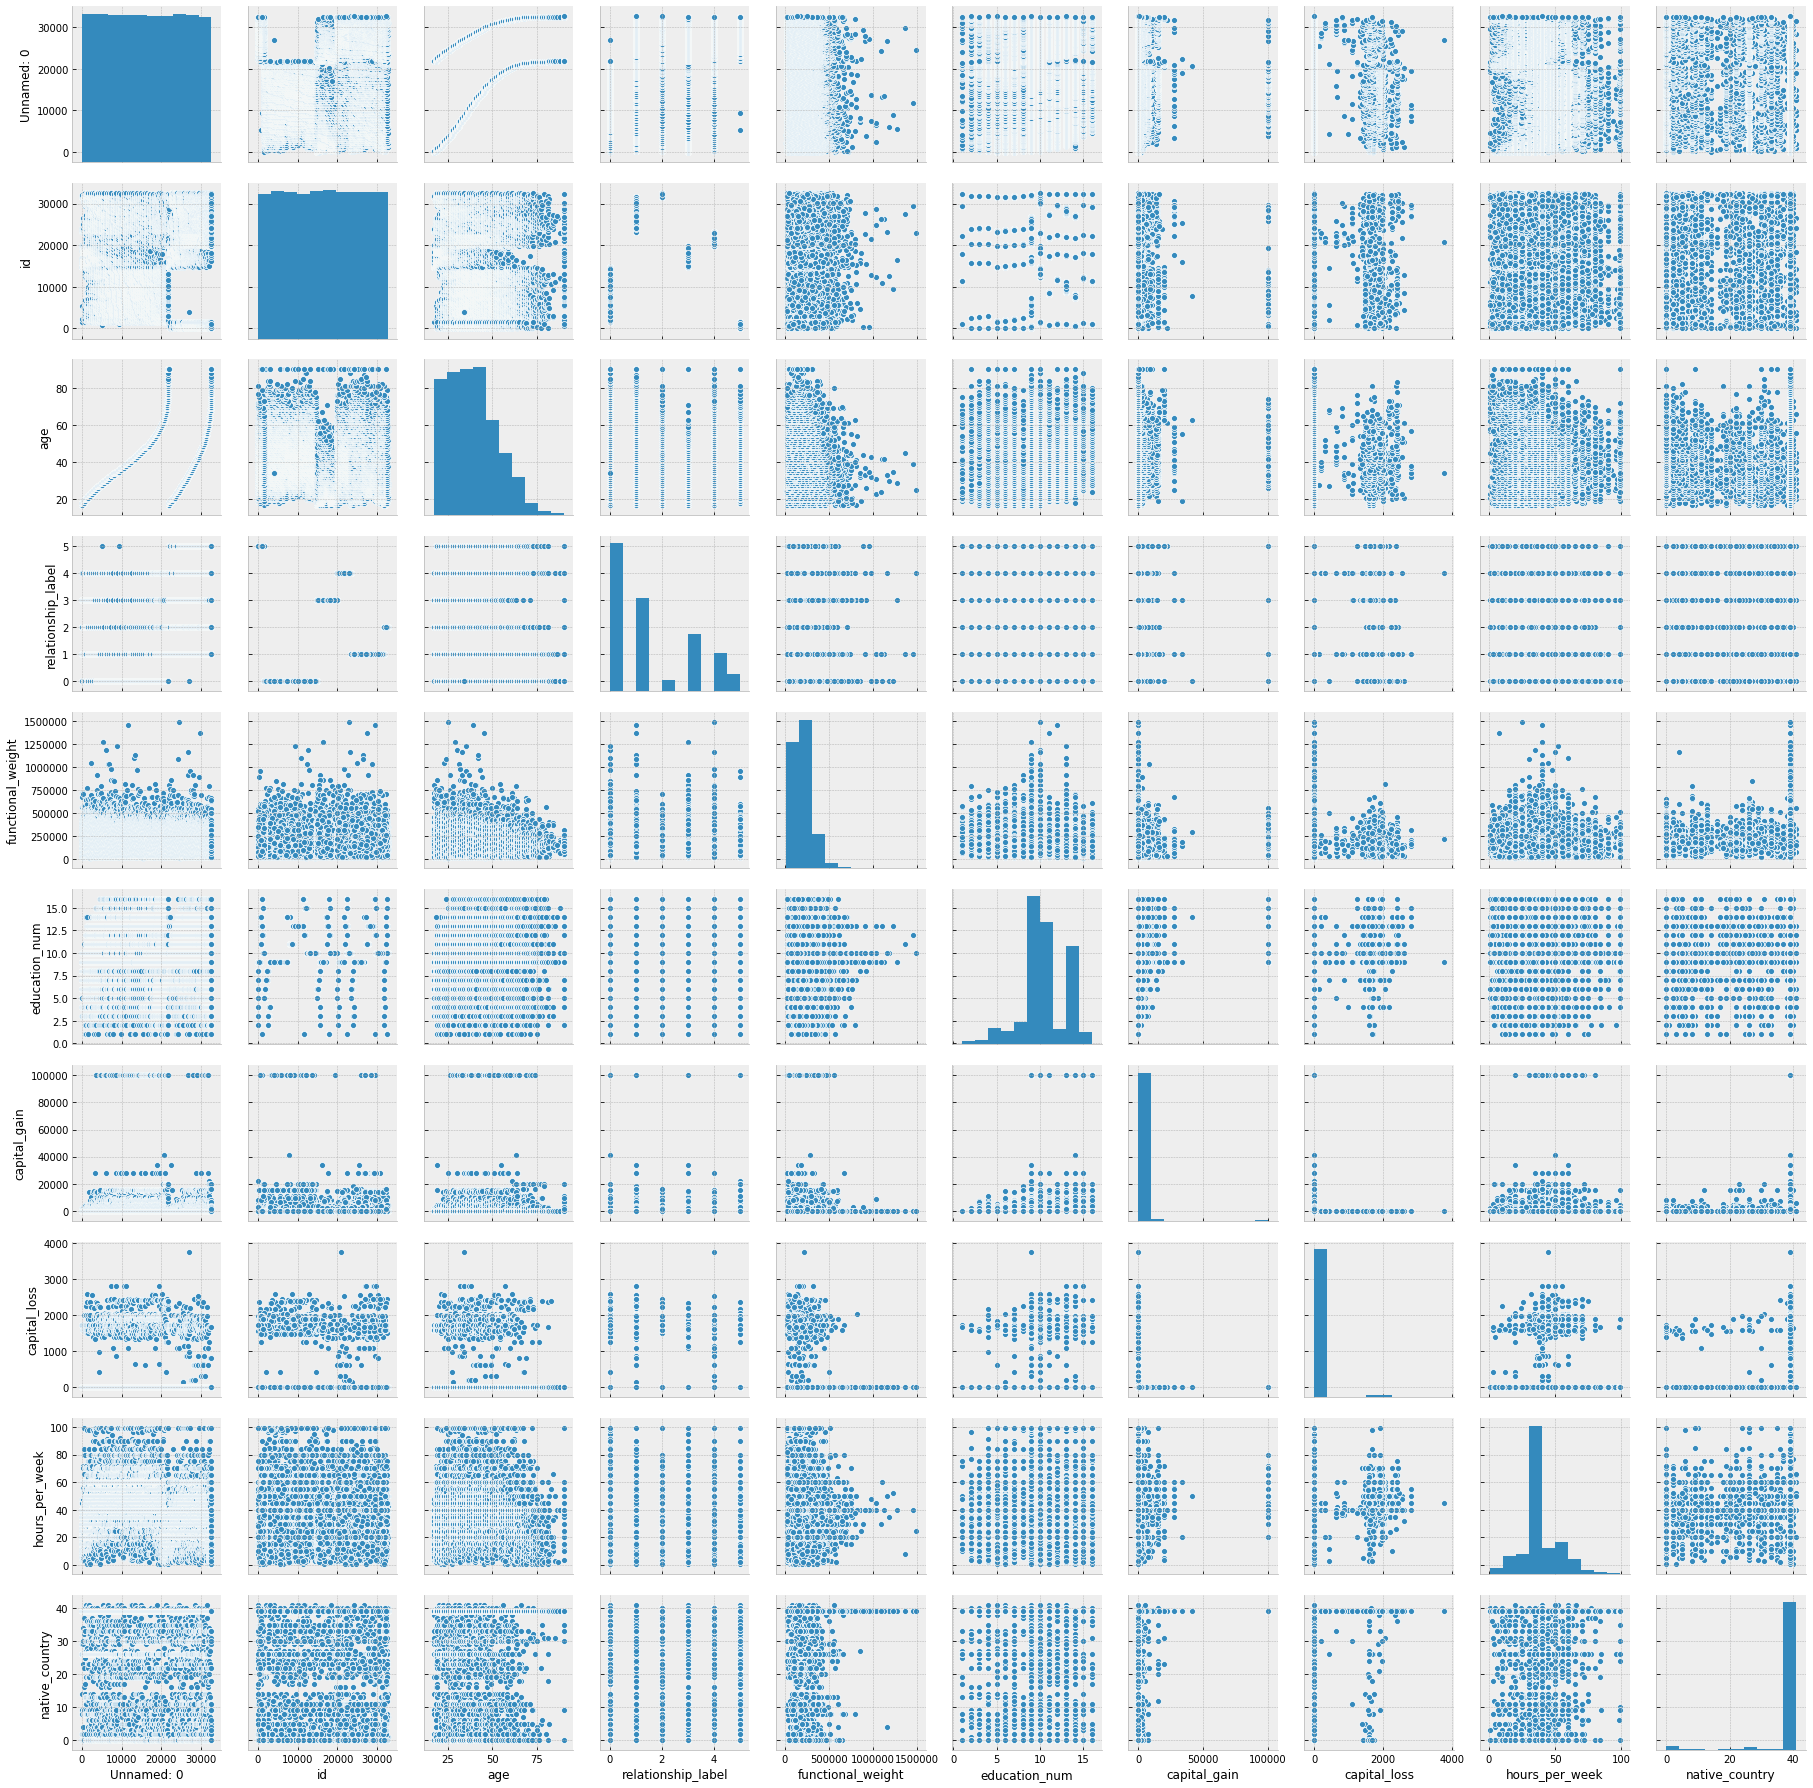

In [29]:
sns.pairplot(df[mask_clear_all]);

## DATA for Models

In [ ]:
X_df = df_train_le.drop(['target'], axis = 1)
y_df = df_train_le['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_df,
    y_df,
    test_size=0.20,
    random_state=42)